Import modules, packages and libraries.

In [ ]:
import seaborn as sns #for drawing
import matplotlib.pyplot as plt #for drawing
%matplotlib inline
import statsmodels.formula.api as smf #for regression analysis
import pandas as pd #data management
import numpy as np #data management

# Check the features

In [ ]:
#Read dataset
df = pd.read_csv('/kaggle/input/customer-data/Mall_Customers.csv')

In [ ]:
df.head()

### Basic Statistics/Correlation

In [ ]:
df.info()

In [ ]:
df.describe()

There are 200 data in total, and the average age is 38.85 years old. The average annual income is 60,560 dollars (8,165,395 yen in Japanese yen). Spending score averages 50.20.

#### Let's change the ID to index.

In [ ]:
df.set_index('CustomerID',inplace = True)

In [ ]:
df.head()

In [ ]:
 df.select_dtypes(include=['float64', 'int64']).corr()

In [ ]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

## Check your analysis with a scatterplot


In [ ]:
plt.scatter(x=df["Annual_Income_(k$)"],y=df["Spending_Score"])
plt.title("Correlation between annual income and expenditure")
plt.xlabel("spending score")
plt.ylabel("annual income")
plt.show()

In [ ]:
plt.scatter(x=df["Age"],y=df["Spending_Score"])
plt.title("Correlation between age and spending")
plt.xlabel("spending score")
plt.ylabel("age")
plt.show()

In [ ]:
plt.scatter(x=df["Annual_Income_(k$)"],y=df["Age"])
plt.title("Correlation between age and income")
plt.xlabel("age")
plt.ylabel("annual income")
plt.show()

In [ ]:
pd.plotting.scatter_matrix(df, alpha = 0.5, figsize = (6, 6), diagonal = "kde");

At first, I thought I could do multiple regression analysis, but clustering seems to be more appropriate.

# kmeans 

First, using any K center points, form a cluster and assign each point to the nearest center point.
Then compute the mean of each cluster and use that as the new center point. Again assign each point to the closest cluster using this new center point, update the center point, and repeat the process.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df= pd.get_dummies(df)
df_1=df.drop('Genre_Male', axis=1)
df_2= df_1.rename(columns={'Genre_Female': 'Gender'}) #male 0 famale

In [ ]:
df_2.corr()

In [ ]:
df_2.head()

In [ ]:
# Determination of optimal number of clusters by elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df_2)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

After the 5th, it will be gradual. Let's analyze with K=5

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


# number of clusters
k = 5

# k-means　clustering
X = df_2[["Age", "Annual_Income_(k$)", "Spending_Score", "Gender"]]
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Get number of cluster
clusters = kmeans.predict(X)
df_3=df_2.copy()

# Output result
df_3["Cluster"] = clusters
print(df_3)

sns.scatterplot(data=df_3, x="Annual_Income_(k$)", y="Spending_Score", hue="Cluster", palette="Paired")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_3[df_3['Cluster']==0]['Age'], df_3[df_3['Cluster']==0]['Annual_Income_(k$)'], color='#a6cee3', label='Cluster 0')
plt.scatter(df_3[df_3['Cluster']==1]['Age'], df_3[df_3['Cluster']==1]['Annual_Income_(k$)'], color='#1f78b4', label='Cluster 1')
plt.scatter(df_3[df_3['Cluster']==2]['Age'], df_3[df_3['Cluster']==2]['Annual_Income_(k$)'], color='#b2df8a', label='Cluster 2')
plt.scatter(df_3[df_3['Cluster']==3]['Age'], df_3[df_3['Cluster']==3]['Annual_Income_(k$)'], color='#33a02c', label='Cluster 3')
plt.scatter(df_3[df_3['Cluster']==4]['Age'], df_3[df_3['Cluster']==4]['Annual_Income_(k$)'], color='#fb9a99', label='Cluster 4')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()


In [ ]:
# Scatterplot of Male
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(df_3[(df_3['Cluster']==0) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==0) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#a6cee3', label='Cluster 0', alpha=0.5)
ax[0].scatter(df_3[(df_3['Cluster']==1) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==1) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#1f78b4', label='Cluster 1', alpha=0.5)
ax[0].scatter(df_3[(df_3['Cluster']==2) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==2) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#b2df8a', label='Cluster 2', alpha=0.5)
ax[0].scatter(df_3[(df_3['Cluster']==3) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==3) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#33a02c', label='Cluster 3', alpha=0.5)
ax[0].scatter(df_3[(df_3['Cluster']==4) & (df_3['Gender']==0)]['Age'], df_3[(df_3['Cluster']==4) & (df_3['Gender']==0)]['Annual_Income_(k$)'], color='#fb9a99', label='Cluster 4', alpha=0.5)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Annual Income (k$)')
ax[0].set_title('Male')
ax[0].legend()

# Scatterplot of famale
ax[1].scatter(df_3[(df_3['Cluster']==0) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==0) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#a6cee3', label='Cluster 0', alpha=0.5)
ax[1].scatter(df_3[(df_3['Cluster']==1) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==1) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#1f78b4', label='Cluster 1', alpha=0.5)
ax[1].scatter(df_3[(df_3['Cluster']==2) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==2) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#b2df8a', label='Cluster 2', alpha=0.5)
ax[1].scatter(df_3[(df_3['Cluster']==3) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==3) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#33a02c', label='Cluster 3', alpha=0.5)
ax[1].scatter(df_3[(df_3['Cluster']==4) & (df_3['Gender']==1)]['Age'], df_3[(df_3['Cluster']==4) & (df_3['Gender']==1)]['Annual_Income_(k$)'], color='#fb9a99', label='Cluster 4', alpha=0.5)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Annual Income (k$)')
ax[1].set_title('Famale')
ax[1].legend()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_3['Annual_Income_(k$)']
y = df_3['Spending_Score']
z = df_3['Age']

ax.scatter(x, y, z, c=df_3['Cluster'])

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_3['Annual_Income_(k$)']
y = df_3['Spending_Score']
z = df_3['Age']

sc = ax.scatter(x, y, z, c=df_3['Cluster'])

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Age')

def update(frame):
    ax.view_init(elev=10., azim=frame)
    return sc,

ani = FuncAnimation(fig, update, frames=range(0, 360, 2), interval=50)
ani.save('animation.gif', writer='imagemagick')


# agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# クラスタ数の指定
k = 5

# 凝集型クラスタリングの実行
X = df_2[["Age", "Annual_Income_(k$)", "Spending_Score", "Gender"]]
agg = AgglomerativeClustering(n_clusters=k).fit(X)

# クラスタ番号の取得
clusters = agg.labels_
df_3=df_2.copy()
df_3["Cluster"] = clusters

sns.scatterplot(data=df_3, x="Annual_Income_(k$)", y="Spending_Score", hue="Cluster", palette="Paired")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()


## Comparison of agglomerative clustering and kmeans

kmeans

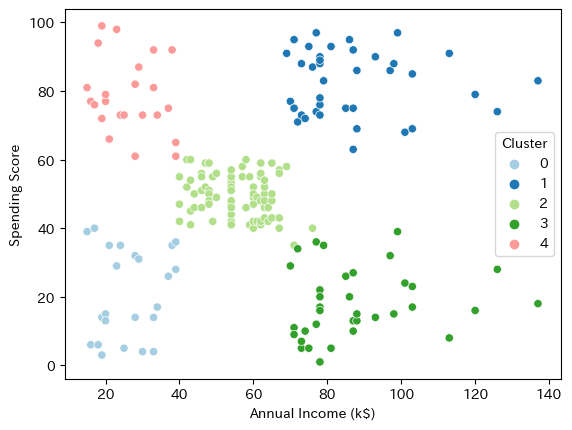

agglomerative clustering 

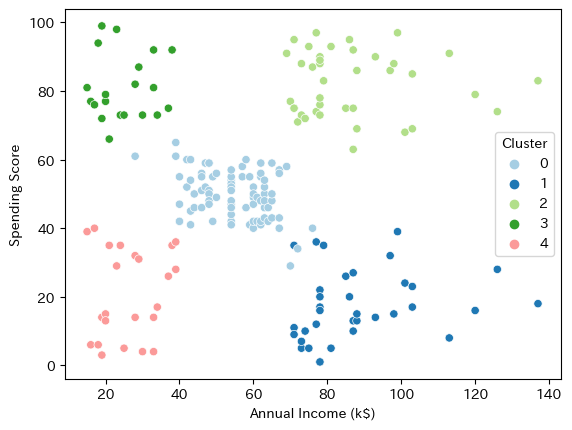